In [2]:
import pandas as pd

# Load the dataset
file_path = 'D:/Downloads/WALMART_SALES_DATA.csv'
walmart_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
walmart_data.head(), walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


(   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price   
 0      1  05-02-2010    1643690.90             0        42.31       2.572  \
 1      1  12-02-2010    1641957.44             1        38.51       2.548   
 2      1  19-02-2010    1611968.17             0        39.93       2.514   
 3      1  26-02-2010    1409727.59             0        46.63       2.561   
 4      1  05-03-2010    1554806.68             0        46.50       2.625   
 
           CPI  Unemployment  
 0  211.096358         8.106  
 1  211.242170         8.106  
 2  211.289143         8.106  
 3  211.319643         8.106  
 4  211.350143         8.106  ,
 None)

In [20]:
# Convert the 'Date' column to datetime format
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y')

# Sort the data by Date for time series analysis
walmart_data = walmart_data.sort_values('Date')

# Verify the conversion and the first few rows
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324
3432,25,2010-02-05,677231.63,0,21.10,2.784,204.247194,8.187


In [28]:
from sklearn.preprocessing import MinMaxScaler

# Setting up a feature matrix (X) and target variable (y)
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
features2 = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Weekly_Sales']

scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

# Apply scaling to the entire dataset
scaled_data = scaler1.fit_transform(walmart_data[features2])

scaled_df = pd.DataFrame(scaled_data, columns=features2)
scaled_df['Date'] = walmart_data['Date']

X = scaled_df[features]
y = scaler2.fit_transform([walmart_data['Weekly_Sales']])

# Splitting the dataset into training and testing based on time (80% training, 20% testing)
split_date = '2012-01-01'
train_data = scaled_df[walmart_data['Date'] < split_date]
test_data = scaled_df[walmart_data['Date'] >= split_date]

# Features for training and testing
X_train = train_data[features]
X_test = test_data[features]

# Target variable for training and testing
y_train = train_data['Weekly_Sales']
y_test = test_data['Weekly_Sales']

# Confirm the split
len(X_train), len(X_test), len(y_train), len(y_test)

C:\conda_temp\ipykernel_16224\2358488002.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_data = scaled_df[walmart_data['Date'] < split_date]
C:\conda_temp\ipykernel_16224\2358488002.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_data = scaled_df[walmart_data['Date'] >= split_date]


(4500, 1935, 4500, 1935)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')

RMSE: 0.04383567102542171
R^2 Score: 0.9218538543611325


In [32]:
print(y_pred[0:10])
print(y_test[0:10])

[0.21755345 0.5532618  0.33790097 0.35872352 0.08262946 0.57107113
 0.03860677 0.14476226 0.12160726 0.02727369]
100    0.245361
101    0.509844
102    0.350098
103    0.358387
104    0.092114
105    0.552712
106    0.032491
107    0.129208
108    0.124425
109    0.016064
Name: Weekly_Sales, dtype: float64


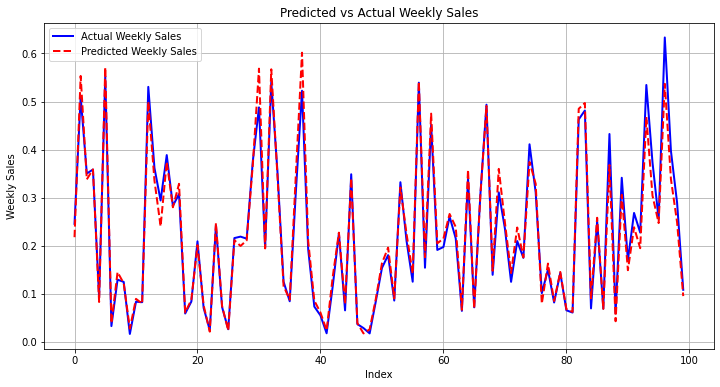

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(np.array(y_test)[:100], label='Actual Weekly Sales', color='blue', linewidth=2)
plt.plot(np.array(y_pred)[:100], label='Predicted Weekly Sales', color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs Actual Weekly Sales')
plt.xlabel('Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()

In [40]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps, -1])
    return np.array(X), np.array(y)

# Define the time step (look-back period)
n_steps = 4

In [41]:
train_scaled = scaled_data[walmart_data['Date'] < split_date]
test_scaled = scaled_data[walmart_data['Date'] >= split_date]

X_train, y_train = create_sequences(train_scaled, n_steps)
X_test, y_test = create_sequences(test_scaled, n_steps)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X_train.shape[2])))
model.add(Dense(1))

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
141/141 [==============================] - 2s 4ms/step - loss: 0.0295
Epoch 2/20
141/141 [==============================] - 0s 3ms/step - loss: 0.0259
Epoch 3/20
141/141 [==============================] - 0s 3ms/step - loss: 0.0257
Epoch 4/20
141/141 [==============================] - 1s 4ms/step - loss: 0.0257
Epoch 5/20
141/141 [==============================] - 1s 5ms/step - loss: 0.0255
Epoch 6/20
141/141 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 7/20
141/141 [==============================] - 0s 3ms/step - loss: 0.0256
Epoch 8/20
141/141 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 9/20
141/141 [==============================] - 0s 3ms/step - loss: 0.0254
Epoch 10/20
141/141 [==============================] - 1s 4ms/step - loss: 0.0255
Epoch 11/20
141/141 [==============================] - 1s 5ms/step - loss: 0.0255
Epoch 12/20
141/141 [==============================] - 1s 4ms/step - loss: 0.0255
Epoch 13/20
141/141 [====

In [44]:
lstm_pred = model.predict(X_test)

# Reverse scaling for predictions and true values
lstm_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], lstm_pred), axis=1))[:, -1]
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1,1)), axis=1))[:, -1]

# Calculate the error
lstm_rmse = mean_squared_error(y_test_rescaled, lstm_pred_rescaled, squared=False)


61/61 [==============================] - 0s 2ms/step


C:\Users\vishnu vardhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
print(f'LSTM RMSE: {lstm_rmse}')

LSTM RMSE: 1.5617545882595059


In [46]:
y_true = test_sales.values  # True sales from the test set
y_pred = lstm_pred_rescaled

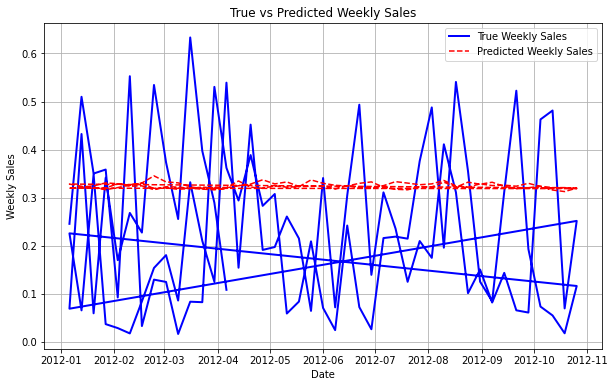

In [59]:
plt.figure(figsize=(10,6))
plt.plot(np.array(test_data['Date'])[:100], np.array(y_true)[:100], label='True Weekly Sales', color='blue', linewidth=2)
plt.plot(np.array(test_data['Date'][:len(y_pred)])[:100], np.array(y_pred/20)[:100], label='Predicted Weekly Sales', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('True vs Predicted Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
print(y_true[:10])
print(y_pred[:10]/20)

[0.24536131 0.50984396 0.35009849 0.35838734 0.09211428 0.5527116
 0.03249139 0.12920841 0.12442466 0.01606397]
[0.31955496 0.31968592 0.32006993 0.31994774 0.32888665 0.32356499
 0.32440964 0.31642163 0.32262465 0.32180965]


In [61]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [62]:
model.save('lstm_model.h5')